In [3]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import cufflinks as cf
cf.go_offline()
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets
from sklearn import linear_model  
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.cross_validation import train_test_split
from IPython.display import Image
from IPython.core.display import HTML
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report
import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go
from pandas.plotting import scatter_matrix
from scipy.stats.stats import pearsonr
from sklearn.cross_validation import train_test_split

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [4]:
os.chdir('/Users/poojapatel/Downloads') 

In [5]:
df_1 = pd.read_csv("big_data.csv")
df_2 = pd.read_csv("big_data_1.csv")

## FIRST STEP:

### Concatenate data from two csv files together. 

In [6]:
df = pd.concat([df_1, df_2])
df = df.reset_index(drop = False)
df = df.drop(df.columns[0], axis =1)

In [7]:
df.columns
df = df.drop(columns=['Unnamed: 0'])

### Clean the price column
#### 1) Removing special characters, outliers and Nan values
#### 2) Change price to float type.
#### )3 Restricting records between 1000 and 150,000 dollars only.


In [8]:
pattern = r"(\W+)"
df["Price"] = df["Price"].str.replace(pattern, "")
df["Price"] = df["Price"].str.replace("Negotiable", "")
df.head()

,Car_Name,Price
0,Bay Area Mobile Mechanic - 2018,4096
1,1997 Toyota T100,800
2,Bay Area Mobile Mechanic - Bay Area Mobile Me...,32
3,bay area mobile mechanic - Bayview auto solu...,36
4,1968 Ford Mustang,600


In [9]:
df["Price"] = df["Price"].replace("",np.NaN)
df["Price"] = df["Price"].astype(float)
df["Price"] = df["Price"][df["Price"] > 1000]
df["Price"] = df["Price"][df["Price"] < 150000]

In [10]:
df = df.dropna()
df =  df.reset_index(drop = True)
df.head()

,Car_Name,Price
0,Bay Area Mobile Mechanic - 2018,4096.0
1,Chrysler 300 2013,14995.0
2,2010 Chevrolet Equinox LS FWD,9991.0
3,1984 GMC Sierra,2500.0
4,2016 Nissan Murano Gun Metallic hatchback,18810.0


In [11]:
#Extract year from car name
pattern = r"([0-9]{4})\b"
df["Year"] = df["Car_Name"].str.extract(pattern)
df["Car_Name"] = df["Car_Name"].str.replace(pattern, "").str.lower()
df.head()

,Car_Name,Price,Year
0,bay area mobile mechanic -,4096.0,2018
1,chrysler 300,14995.0,2013
2,chevrolet equinox ls fwd,9991.0,2010
3,gmc sierra,2500.0,1984
4,nissan murano gun metallic hatchback,18810.0,2016


In [12]:
#drop duplicate records
df_2= df.drop_duplicates(keep=False)
df_2 = df_2.dropna()
df_2 =  df_2.reset_index(drop = True)

In [13]:
df_2.head()

,Car_Name,Price,Year
0,bay area mobile mechanic -,4096.0,2018
1,chrysler 300,14995.0,2013
2,chevrolet equinox ls fwd,9991.0,2010
3,gmc sierra,2500.0,1984
4,nissan murano gun metallic hatchback,18810.0,2016


In [14]:
#change year to float type and keep year values beyond 1900 only
df_2["Year"] = df_2["Year"].astype(float)
df_2 = df_2[df_2["Year"].between(1900,2019)]
df_2 =  df_2.reset_index(drop = True)
df_2.drop(df_2.index[0])

,Car_Name,Price,Year
1,chrysler 300,14995.0,2013.0
2,chevrolet equinox ls fwd,9991.0,2010.0
3,gmc sierra,2500.0,1984.0
4,nissan murano gun metallic hatchback,18810.0,2016.0
5,toyota sienna se,22600.0,2015.0
6,porsche 911 930 turbo,135150.0,1987.0
7,chevrolet c,5000.0,1989.0
8,saab - 9-3 -,13993.0,2001.0
9,"alfa romeo giulia ti sport rwd (1,000 miles)",36000.0,2018.0
10,mazda mazda6 snowflake white pearl mica sedan,15940.0,2017.0


In [15]:
#get a list of all manufacturers
car_names = ["Acura"
,"Aixam"
,"Alfa Romeo"
,"Aston Martin"
,"Audi"
,"Dacia"
,"Bentley"
,"BMW"
,"Bufori"
,"Bugatti"
,"Buick"
,"Cadillac"
,"Chevrolet"
,"Chrysler"
,"Citroen"
,"Daihatsu"
,"Dodge"
,"DR Motor"
,"Ferrari"
,"Fiat"
,"Fisker"
,"Ford"
,"GMC"
,"Holden"
,"Honda"
,"Hyundai"
,"Infiniti"
,"Jaguar"
,"Jeep"
,"Kia"
,"Koenigsegg"
,"Lada"
,"Lamborghini"
,"Lancia"
,"Land Rover"
,"Lexus"
,"Lincoln"
,"Lobini"
,"Lotus"
,"Marcos"
,"Marussia"
,"Maserati"
,"Mastretta"
,"Maybach"
,"Mazda"
,"Mercedes-Benz"
,"MG"
,"Mini"
,"Mitsubishi"
,"Morgan"
,"Nissan"
,"Noble"
,"Opel"
,"Pagani"
,"Perodua"
,"Peugeot"
,"Porsche"
,"Proton"
,"Renault"
,"Rolls Royce"
,"Rover"
,"Scion"
,"SEAT"
,"Skoda Auto"
,"Spyker"
,"SsangYong"
,"Subaru"
,"Suzuki"
,"TAC Motors"
,"Tesla"
,"Toyota"
,"Vauxhall","Volkswagen" ,"Volvo"]
new_cars=[]
for x in car_names:
    new_cars.append(x.lower())

In [16]:
#Retrieve manufacturer from the car name
pattern = ('({})'.format('|'.join(new_cars)))
df_2["Brand_name"] = df_2["Car_Name"].str.extract('({})'.format('|'.join(new_cars)))
df_2 = df_2.dropna()
df_2.head(10)

,Car_Name,Price,Year,Brand_name
1,chrysler 300,14995.0,2013.0,chrysler
2,chevrolet equinox ls fwd,9991.0,2010.0,chevrolet
3,gmc sierra,2500.0,1984.0,gmc
4,nissan murano gun metallic hatchback,18810.0,2016.0,nissan
5,toyota sienna se,22600.0,2015.0,toyota
6,porsche 911 930 turbo,135150.0,1987.0,porsche
7,chevrolet c,5000.0,1989.0,chevrolet
9,"alfa romeo giulia ti sport rwd (1,000 miles)",36000.0,2018.0,alfa romeo
10,mazda mazda6 snowflake white pearl mica sedan,15940.0,2017.0,mazda
11,dodge challenger torred clearcoat coupe,19970.0,2016.0,dodge


In [17]:
#Calculate the age column, change type of year and price to integer
def subt(element):
    return 2019 - element
df_2["Age"] = df_2["Year"].apply(subt).astype(int)
df_2["Year"] = df_2["Year"].astype(int)
df_2["Price"] = df_2["Price"].astype(int)
df_2.head()

,Car_Name,Price,Year,Brand_name,Age
1,chrysler 300,14995,2013,chrysler,6
2,chevrolet equinox ls fwd,9991,2010,chevrolet,9
3,gmc sierra,2500,1984,gmc,35
4,nissan murano gun metallic hatchback,18810,2016,nissan,3
5,toyota sienna se,22600,2015,toyota,4


In [18]:
#Rename columns and consider data with frequency of counts greater than 10
df_2 = df_2.rename(columns={'Car_Name': 'Car Name', 'Year': 'Make Year', "Brand_name": "Manufacturer"})
df_2
counts = df_2["Manufacturer"].value_counts()
counts[counts > 10]

df_2 = df_2[df_2['Manufacturer'].isin(counts[counts > 10].index)]
df_2.head(10)

,Car Name,Price,Make Year,Manufacturer,Age
1,chrysler 300,14995,2013,chrysler,6
2,chevrolet equinox ls fwd,9991,2010,chevrolet,9
3,gmc sierra,2500,1984,gmc,35
4,nissan murano gun metallic hatchback,18810,2016,nissan,3
5,toyota sienna se,22600,2015,toyota,4
7,chevrolet c,5000,1989,chevrolet,30
10,mazda mazda6 snowflake white pearl mica sedan,15940,2017,mazda,2
11,dodge challenger torred clearcoat coupe,19970,2016,dodge,3
12,acura tl,12792,2012,acura,7
13,gmc envoy,2600,2004,gmc,15


### Data Analysis
#### 1) What is the mean price for different car manufacturers?

In [19]:
model_mean_price = df_2.pivot_table(values='Price', index='Manufacturer', aggfunc=np.mean)

In [20]:
model_mean_price = round(model_mean_price,2)
model_mean_price = model_mean_price.sort_values(by = "Price", ascending = False)
model_mean_price.head()

,Price
Manufacturer,
mercedes-benz,18176.21
jeep,15506.84
dodge,14457.65
subaru,14016.25
chevrolet,13156.61


### Top 10 manufacturers by price 

In [21]:
top_10 = model_mean_price[:10]
top_10.head()
top_10.iplot(kind = "bar", title = "Mean Price By Manufacturer")

#### 2) What is the average age of cars grouped by their manufacturer?

In [22]:
model_mean_age = df_2.pivot_table(values='Age', index='Manufacturer', aggfunc=[np.min,np.mean,np.max], margins = True)
model_mean_age = round(model_mean_age,2)
model_mean_age
model_mean_age = model_mean_age.sort_values(by = ("mean","Age"), ascending = False)
model_mean_age.head()


,amin,mean,amax
,Age,Age,Age
Manufacturer,,,
chevrolet,0,20.24,94
gmc,2,18.27,57
ford,0,16.11,94
cadillac,4,16.06,54
lincoln,1,15.00,50


In [23]:
model_mean_age1 = df_2.pivot_table(values='Age', index='Manufacturer', aggfunc=np.mean, margins = True)
model_mean_age1 = round(model_mean_age1,2)
model_mean_age1
model_mean_age1 = model_mean_age1.sort_values(by = "Age", ascending = False)
model_mean_age1
model_mean_age1.iplot(kind = "bar",title = "Mean Age By Manufacturer")


#### 3)Manufacturer Market Share in Used Car Market'?

In [24]:
most_avail = df_2["Manufacturer"].value_counts()
most_avail
most_avail = most_avail.to_frame(name = "Count")
most_avail
# most_avail.iplot(kind='pie', labels= "Manufacturer", values='Count', title='Manufacturer Market Share', hoverinfo="label+percent+name", hole=0.3)

,Count
ford,204
honda,161
chevrolet,160
toyota,151
bmw,89
nissan,87
dodge,66
volkswagen,56
hyundai,52
jeep,50


In [25]:
most_avail

,Count
ford,204
honda,161
chevrolet,160
toyota,151
bmw,89
nissan,87
dodge,66
volkswagen,56
hyundai,52
jeep,50


#### 4) What is the average distribution of mean price of cars?

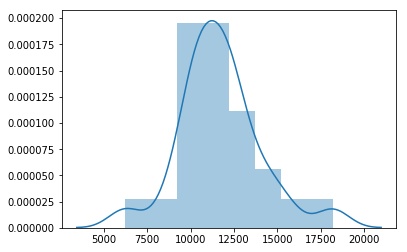

In [26]:
model_mean_price
sns.distplot(model_mean_price) 

#### Majority of the cars have a mean price of 10,000.

In [27]:
car_data = df_2.copy()
car_data

,Car Name,Price,Make Year,Manufacturer,Age
1,chrysler 300,14995,2013,chrysler,6
2,chevrolet equinox ls fwd,9991,2010,chevrolet,9
3,gmc sierra,2500,1984,gmc,35
4,nissan murano gun metallic hatchback,18810,2016,nissan,3
5,toyota sienna se,22600,2015,toyota,4
7,chevrolet c,5000,1989,chevrolet,30
10,mazda mazda6 snowflake white pearl mica sedan,15940,2017,mazda,2
11,dodge challenger torred clearcoat coupe,19970,2016,dodge,3
12,acura tl,12792,2012,acura,7
13,gmc envoy,2600,2004,gmc,15


In [28]:
ford_manufacturer = car_data.loc[car_data['Manufacturer']=='ford']
ford_manufacturer

,Car Name,Price,Make Year,Manufacturer,Age
21,ford fusion,4050,2014,ford,5
30,ford - f-2 -,6800,2008,ford,11
32,ford windstar,1300,2003,ford,16
35,ford - windstar -,2000,1998,ford,21
52,ford fusion black sedan,15750,2017,ford,2
60,ford mustang gt,9500,2006,ford,13
67,ford mustang,7000,2006,ford,13
70,ford escape white hatchback,19980,2019,ford,0
82,ford f-250 super duty lariat supercab swb,10000,2005,ford,14
92,ford mustang,2450,2000,ford,19


In [29]:
#Find the pairwise correlation of all columns in a dataframe.

In [30]:
pearsoncorr = ford_manufacturer.corr(method='pearson')
pearsoncorr

,Price,Make Year,Age
Price,1.000000,-0.212832,0.212832
Make Year,-0.212832,1.000000,-1.000000
Age,0.212832,-1.000000,1.000000


In [31]:
# correlation coefficient could be calculated to determine the level of correlation between the Price and Age

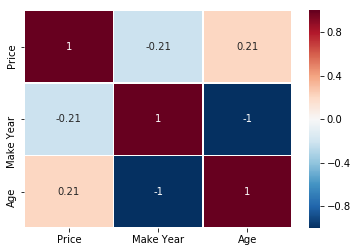

In [32]:
#Using Seaborn to calculate the pearsons coefficient correlations
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

A coefficient close to 1 means that there's a moderate positive correlation between Price and Age. 
In our case there is week correlations between the variables.
But light color shows there is some positive and negative correlation between the Price and Age.

In [33]:
#LINEAR REGRESSION
#IS way to model a relationship between two sets of variables that is Price and Age.

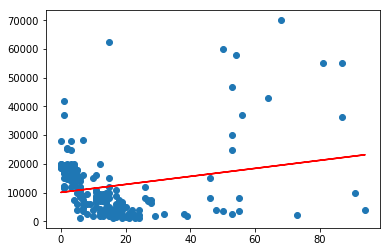

In [34]:
X = ford_manufacturer.iloc[:, 4].values.reshape(-1, 1) # Age
Y = ford_manufacturer.iloc[:, 1].values.reshape(-1, 1) # Price
#Y = data_1.iloc[:, 5].values
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='Red')
plt.show()

Age is Dependent Variable and Price is Independent variable.
Price is a variable that we are using to make a prediction of continous variable.
The regression line from the errors would be minimal

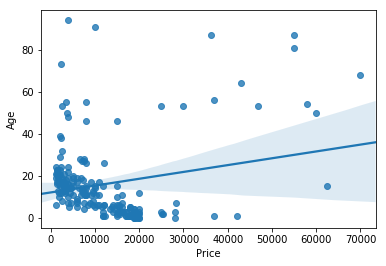

In [35]:
sns.regplot(x='Price',y='Age',data=ford_manufacturer,scatter=True)

This plot presents overplotting as 204 samples are plotted. 
The plot shows a positive linear relation between Price and Age.

In [36]:
import statsmodels.api as sm
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)
lm = LinearRegression()
lm.fit(X_train,Y_train)
predictions = lm.predict(X_test)
#plt.scatter(Y_test,predictions)
# Note the difference in argument order
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     105.5
Date:                Sat, 07 Dec 2019   Prob (F-statistic):           3.34e-20
Time:                        16:44:15   Log-Likelihood:                -2236.2
No. Observations:                 204   AIC:                             4474.
Df Residuals:                     203   BIC:                             4478.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           412.3795     40.143     10.273      0.000     333.229     491.530
==============================================================================
Omnibus:                       12.472   Durbin-Watson:                   1.629
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               18.427
Skew:                           0.378   Prob(JB):                     9.97e-05
Kurtosis:                       4.263   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

we split 80% of the data to the training set while 20% of the data to test

In [37]:
# OLS Stands for Ordinary Least Square.
# The method is Least Square means fit a regression line that would minimize the square of distance from the regression line
# The coefficient of 0.0008 means that as the RM variable increases by 1, the predicted value of MDEV increases by 0.0008
# The REGRESSION MODEL has statistically significant p-value because is less than the 0.05
# R-squared value — 0.342, meaning that this model explains 3.42% of the variance in our dependent variable (AGE).

In [38]:
# The lm.fit() function fits a linear model. 
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
# We want to use the model to make predictions
predictions = lm.predict(X)
# print(predictions)

R² score of our model is 0.045 means the (4.5%) percentage of explained variance of the predictions.

In [39]:
#The coefficients for the predictors:
print("Score is: ", lm.score(X,Y))
print("co-efficent is: ", lm.coef_)
print("Intercept: ", lm.intercept_)

Score is:  0.045297658168114485
co-efficent is:  [[139.3973972]]
Intercept:  [10077.74094509]


We want to predict the Price depending upon the Age recorded.
The result should be approximately 0.00032495 and 12.10339938 respectively.
This means that for every one unit of change in Price, the change in the Age is about 0.12%.

In [40]:
#Using Scipy to calculate the pearsons coefficient correlations
price = ford_manufacturer['Price']
age = ford_manufacturer['Age']
make_year = car_data['Make Year']
pearsonr_coefficent, p_value = pearsonr(price,age)
print('pearsonr correlation coefficent: %0.3f'%(pearsonr_coefficent))
print('P_Values: %0.3f'% p_value)

pearsonr correlation coefficent: 0.213
P_Values: 0.002


Pearsonr correlation coefficent is 0.213 that means there is moderate coefficeint corelation between them.
The correlation coefficient is a measure of linear relationship and thus a value of (0.213)
It imply  there  is  moderate positive  relationship  between  the  Price and Age.
P value is 0.002 which is less than the 0.05, it means that the correlation coefficient is very highly significantly between the Price and AGE

It’s not a very strong relationship, but it accurately represents our data. An accurate representation is the best-case scenario for using a statistic to describe an entire dataset.

#Doing Linear Regression and Correlation with honda and chevrolet (323 variables)

In [41]:
honda_manufacturer = car_data.loc[car_data['Manufacturer']== 'honda']
chevrolet_manufacturer = car_data.loc[car_data['Manufacturer']== 'chevrolet']
merge_honda_chevrolet = [honda_manufacturer,chevrolet_manufacturer]
honda_chevrolet = pd.concat(merge_honda_chevrolet)
chevrolet_manufacturer

,Car Name,Price,Make Year,Manufacturer,Age
2,chevrolet equinox ls fwd,9991,2010,chevrolet,9
7,chevrolet c,5000,1989,chevrolet,30
47,chevy chevrolet camaro silver ice metallic co...,19030,2018,chevrolet,1
50,chevy chevrolet impala summit white sedan,17390,2018,chevrolet,1
55,chevrolet suburban z71,3800,2002,chevrolet,17
65,chevrolet impala super sport,35990,1965,chevrolet,54
69,chevrolet silverado,2900,1996,chevrolet,23
81,chevrolet malibu,10999,2013,chevrolet,6
83,chevrolet corvette,3500,1988,chevrolet,31
84,chevy chevrolet malibu crystal red tintcoat s...,19190,2016,chevrolet,3


In [42]:
pearsoncorr_1 = honda_manufacturer.corr(method='pearson')
pearsoncorr_1

,Price,Make Year,Age
Price,1.000000,0.862239,-0.862239
Make Year,0.862239,1.000000,-1.000000
Age,-0.862239,-1.000000,1.000000


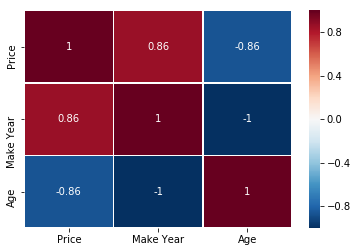

In [43]:
#Using Seaborn to calculate the pearsons coefficient correlations
sns.heatmap(pearsoncorr_1, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

A coefficient close to 1 means that there's a moderate positive correlation between Price and Age. 
In our case there is strong correlations between the variables.
And there is strong Negative correlation between Price and Age.

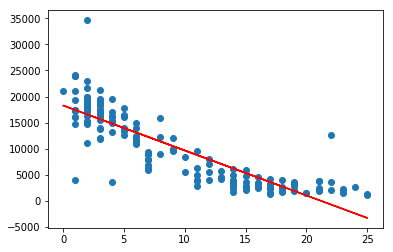

In [44]:
X1 = honda_manufacturer.iloc[:, 4].values.reshape(-1, 1) # Age
Y1 = honda_manufacturer.iloc[:, 1].values.reshape(-1, 1) # Price
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X1, Y1)  # perform linear regression
Y1_pred = linear_regressor.predict(X1)  # make predictions
plt.scatter(X1, Y1)
plt.plot(X1, Y1_pred, color='Red')
plt.show()

The plot shows a Negative linear relation between Price and Age.
Fits the model perpendicular. 


In [45]:
import statsmodels.api as sm
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.2, random_state=100)
lm1 = LinearRegression()
lm1.fit(X_train,Y_train)
predictions = lm1.predict(X_test)
#plt.scatter(Y_test,predictions)
# Note the difference in argument order
model = sm.OLS(Y1, X1).fit()
predictions = model.predict(X1) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     24.36
Date:                Sat, 07 Dec 2019   Prob (F-statistic):           1.99e-06
Time:                        16:44:17   Log-Likelihood:                -1734.2
No. Observations:                 161   AIC:                             3470.
Df Residuals:                     160   BIC:                             3473.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           383.0891     77.616      4.936      0.000     229.805     536.374
==============================================================================
Omnibus:                       59.432   Durbin-Watson:                   1.336
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.000
Skew:                           0.170   Prob(JB):                      0.00674
Kurtosis:                       1.828   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
#Using Scipy to calculate the pearsons coefficient correlations
price = honda_manufacturer['Price']
age = honda_manufacturer['Age']
make_year = honda_manufacturer['Make Year']
pearsonr_coefficent, p_value = pearsonr(price,age)
print('pearsonr correlation coefficent: %0.9f'%(pearsonr_coefficent))
print('P_Values: %0.9f'% p_value)

pearsonr correlation coefficent: -0.862238840
P_Values: 0.000000000


In [47]:
# The lm.fit() function fits a linear model. 
lm1 = linear_model.LinearRegression()
model = lm1.fit(X1,Y1)
# We want to use the model to make predictions
predictions = lm1.predict(X1)
# print(predictions)

In [48]:
print(lm1.score(X1,Y1))
print(lm1.coef_)
print(lm1.intercept_)

0.743455817442835
[[-863.27066965]]
[18283.51256632]


In [49]:
toyota_manufacturer = car_data.loc[car_data['Manufacturer']== 'toyota']
bmw_manufacturer = car_data.loc[car_data['Manufacturer']== 'bmw']
toyota_bmw = [toyota_manufacturer,bmw_manufacturer]
bmw_toyota = pd.concat(toyota_bmw)
#toyota_manufacturer
bmw_toyota

,Car Name,Price,Make Year,Manufacturer,Age
5,toyota sienna se,22600,2015,toyota,4
15,toyota - camry -,2000,1999,toyota,20
16,toyota tacoma regular cab,4500,2001,toyota,18
22,toyota camery,4988,2008,toyota,11
29,toyota - camry -,3999,2001,toyota,18
34,toyota pickup,3800,1995,toyota,24
38,toyota camry le,15450,2017,toyota,2
77,toyota celica,1500,2005,toyota,14
89,toyota camry silver sedan,19380,2018,toyota,1
101,toyota highlander sport,10950,2008,toyota,11


In [50]:
pearsoncorr_2 = bmw_toyota.corr(method='pearson')
pearsoncorr_2

,Price,Make Year,Age
Price,1.000000,0.311246,-0.311246
Make Year,0.311246,1.000000,-1.000000
Age,-0.311246,-1.000000,1.000000


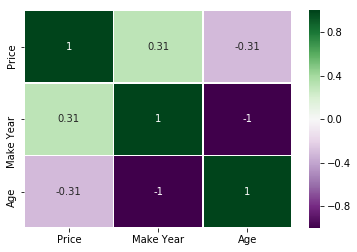

In [51]:
#Using Seaborn to calculate the pearsons coefficient correlations
sns.heatmap(pearsoncorr_2, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='PRGn',
            annot=True,
            linewidth=0.5)

A coefficient close to 1 means that there's a moderate positive correlation between Price and Age. 
In our case there is weak correlation between the variables.
And there is some Negative correlation between Price and Age.

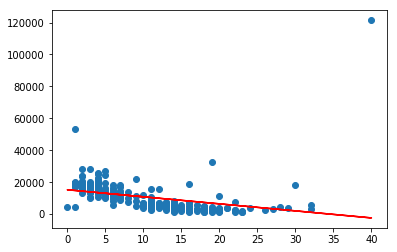

In [52]:
X3 = bmw_toyota.iloc[:, 4].values.reshape(-1, 1) # Price
Y3 = bmw_toyota.iloc[:, 1].values.reshape(-1, 1) # Age
#Y = data_1.iloc[:, 5].values
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X3, Y3)  # perform linear regression
Y3_pred = linear_regressor.predict(X3)  # make predictions
plt.scatter(X3, Y3)
plt.plot(X3, Y3_pred, color='Red')
plt.show()

There is a slight negative linear trend between Price and Age.

In [53]:
import statsmodels.api as sm
X_train, X_test, Y_train, Y_test = train_test_split(X3, Y3, test_size=0.2, random_state=100)
lm3 = LinearRegression()
lm3.fit(X_train,Y_train)
predictions = lm3.predict(X_test)
#plt.scatter(Y_test,predictions)
# Note the difference in argument order
model = sm.OLS(X3, Y3).fit()
predictions = model.predict(X3) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     66.28
Date:                Sat, 07 Dec 2019   Prob (F-statistic):           2.16e-14
Time:                        16:44:18   Log-Likelihood:                -925.89
No. Observations:                 240   AIC:                             1854.
Df Residuals:                     239   BIC:                             1857.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0004   5.01e-05      8.141      0.000       0.000       0.001
==============================================================================
Omnibus:                       22.794   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.967
Skew:                           0.124   Prob(JB):                       0.0186
Kurtosis:                       2.143   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# The lm.fit() function fits a linear model. 
lm_3 = linear_model.LinearRegression()
model = lm_3.fit(X3,Y3)
# We want to use the model to make predictions
predictions = lm_3.predict(X3)
# print(predictions)

In [55]:
print(lm_3.score(X3,Y3))
print(lm_3.coef_)
print(lm_3.intercept_)

0.09687424670318666
[[-440.91851492]]
[15265.20378869]


In [56]:
nissan_manufacturer = car_data.loc[car_data['Manufacturer']== 'nissan']
volkswagen_manufacturer = car_data.loc[car_data['Manufacturer']== 'volkswagen']
nissan_volkswagen = [nissan_manufacturer, volkswagen_manufacturer]
nissan_volkswagen_merge = pd.concat(nissan_volkswagen)
nissan_volkswagen_merge

,Car Name,Price,Make Year,Manufacturer,Age
4,nissan murano gun metallic hatchback,18810,2016,nissan,3
68,nissan rogue sl,17900,2016,nissan,3
73,nissan sentra silver sedan,11370,2015,nissan,4
80,nissan-rogue-,13990,2017,nissan,2
129,nissan xterra se v6 at,3195,2004,nissan,15
146,nissan altima,11999,2014,nissan,5
150,nissan sentra super black sedan,9640,2013,nissan,6
156,nissan altima,16990,2018,nissan,1
171,nissan sentra gun metallic sedan,11820,2018,nissan,1
210,nissan sentra 2.0,8350,2012,nissan,7


In [57]:
pearsoncorr_3 = nissan_volkswagen_merge.corr(method='pearson')
pearsoncorr_3

,Price,Make Year,Age
Price,1.000000,0.837412,-0.837412
Make Year,0.837412,1.000000,-1.000000
Age,-0.837412,-1.000000,1.000000


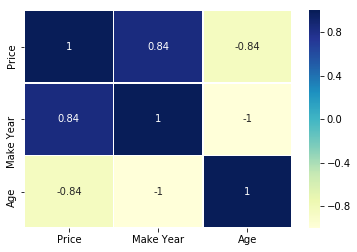

In [58]:
#Using Seaborn to calculate the pearsons coefficient correlations
import seaborn as sns
sns.heatmap(pearsoncorr_3, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='YlGnBu',
            annot=True,
            linewidth=0.5)

A coefficient close to 1 means that there's a moderate positive correlation between Price and Age. 
In our case there is strong correlation between the variables.
And there is high Negative correlation between Price and Age.

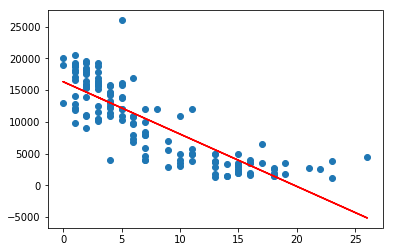

pearsonr correlation coefficent: -0.837
P_Values: 0.000


In [71]:
X4 = nissan_volkswagen_merge.iloc[:, 4].values.reshape(-1, 1) # Price
Y4 = nissan_volkswagen_merge.iloc[:, 1].values.reshape(-1, 1) # Age
#Y = data_1.iloc[:, 5].values
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X4, Y4)  # perform linear regression
Y4_pred = linear_regressor.predict(X4)  # make predictions
plt.scatter(X4, Y4)
plt.plot(X4, Y4_pred, color='Red')
plt.show()
price = nissan_volkswagen_merge['Price']
age = nissan_volkswagen_merge['Age']
pearsonr_coefficent, p_value = pearsonr(price,age)
print('pearsonr correlation coefficent: %0.3f'%(pearsonr_coefficent))
print('P_Values: %0.3f'% p_value)
# The lm.fit() function fits a linear model. 
lm_4 = linear_model.LinearRegression()
model = lm_4.fit(X4,Y4)
# We want to use the model to make predictions
predictions = lm_4.predict(X4)
# print(predictions)

The plot shows a Negative linear relation between Price and Age.
Fits the model perpendicular. 

In [60]:
import statsmodels.api as sm
X_train, X_test, Y_train, Y_test = train_test_split(X4, Y4, test_size=0.2, random_state=100)
lm_4 = LinearRegression()
lm_4.fit(X_train,Y_train)
predictions = lm_4.predict(X_test)
#plt.scatter(Y_test,predictions)
# Note the difference in argument order
model = sm.OLS(X4, Y4).fit()
predictions = model.predict(X4) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     25.60
Date:                Sat, 07 Dec 2019   Prob (F-statistic):           1.28e-06
Time:                        16:44:20   Log-Likelihood:                -519.07
No. Observations:                 143   AIC:                             1040.
Df Residuals:                     142   BIC:                             1043.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0003   6.56e-05      5.060      0.000       0.000       0.000
==============================================================================
Omnibus:                       24.295   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.638
Skew:                           0.556   Prob(JB):                      0.00180
Kurtosis:                       2.060   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
print(lm_4.score(X4,Y4))
print(lm_4.coef_)
print(lm_4.intercept_)

0.6942320926596173
[[-905.49616929]]
[17068.19468503]


In [62]:
toyota_manufacturer = car_data.loc[car_data['Manufacturer']== 'toyota']
toyota_manufacturer

,Car Name,Price,Make Year,Manufacturer,Age
5,toyota sienna se,22600,2015,toyota,4
15,toyota - camry -,2000,1999,toyota,20
16,toyota tacoma regular cab,4500,2001,toyota,18
22,toyota camery,4988,2008,toyota,11
29,toyota - camry -,3999,2001,toyota,18
34,toyota pickup,3800,1995,toyota,24
38,toyota camry le,15450,2017,toyota,2
77,toyota celica,1500,2005,toyota,14
89,toyota camry silver sedan,19380,2018,toyota,1
101,toyota highlander sport,10950,2008,toyota,11


In [63]:
pearsoncorr_2 = toyota_manufacturer.corr(method='pearson')
pearsoncorr_2

,Price,Make Year,Age
Price,1.000000,0.720563,-0.720563
Make Year,0.720563,1.000000,-1.000000
Age,-0.720563,-1.000000,1.000000


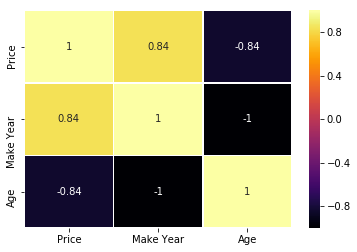

In [69]:
#Using Seaborn to calculate the pearsons coefficient correlations
sns.heatmap(pearsoncorr_3, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='inferno',
            annot=True,
            linewidth=0.5)

A coefficient close to 1 means that there's a moderate positive correlation between Price and Age. 
In our case there is strong correlation between the variables.
And there is high Negative correlation between Price and Age.

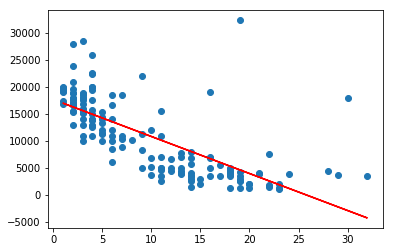

In [65]:
X5 = toyota_manufacturer.iloc[:, 4].values.reshape(-1, 1) # Price
Y5 = toyota_manufacturer.iloc[:, 1].values.reshape(-1, 1) # Age
#Y = data_1.iloc[:, 5].values
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X5, Y5)  # perform linear regression
Y5_pred = linear_regressor.predict(X5)  # make predictions
plt.scatter(X5, Y5)
plt.plot(X5, Y5_pred, color='Red')
plt.show()

The plot shows a Negative linear relation between Price and Age.
Fits the model perpendicular. 

In [66]:
price = toyota_manufacturer['Price']
age = toyota_manufacturer['Age']
make_year = toyota_manufacturer['Make Year']
pearsonr_coefficent, p_value = pearsonr(price,age)
print('pearsonr correlation coefficent: %0.3f'%(pearsonr_coefficent))
print('P_Values: %0.3f'% p_value)
# The lm.fit() function fits a linear model. 
lm_5 = linear_model.LinearRegression()
model = lm_5.fit(X5,Y5)
# We want to use the model to make predictions
predictions = lm_5.predict(X5)
# print(predictions)

pearsonr correlation coefficent: -0.721
P_Values: 0.000


In [67]:
import statsmodels.api as sm
X_train, X_test, Y_train, Y_test = train_test_split(X5, Y5, test_size=0.2, random_state=100)
lm_5 = LinearRegression()
lm_5.fit(X_train,Y_train)
predictions = lm_5.predict(X_test)
#plt.scatter(Y_test,predictions)
# Note the difference in argument order
model = sm.OLS(X5, Y5).fit()
predictions = model.predict(X5) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     34.83
Date:                Sat, 07 Dec 2019   Prob (F-statistic):           2.31e-08
Time:                        16:44:22   Log-Likelihood:                -576.19
No. Observations:                 151   AIC:                             1154.
Df Residuals:                     150   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0004   6.86e-05      5.902      0.000       0.000       0.001
==============================================================================
Omnibus:                       27.028   Durbin-Watson:                   1.457
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.998
Skew:                           0.443   Prob(JB):                      0.00409
Kurtosis:                       2.018   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
print(lm_5.score(X5,Y5))
print(lm_5.coef_)
print(lm_5.intercept_)

0.5181784892529875
[[-715.91479497]]
[17915.33468473]
